1. Mean-Reversion assumes that from time to time financial instruments are extremely priced: either too high or too low
2. Overbought: Too high prices, Oversold: Extremely low prices
3. Mean-Reversion assumes that extreme prices move back to average mean price over time
4. Extreme prices could be quantitatively defined used a statistical indicator Bollinger Band, which normally assumes prices 2 standard deviation away from the mean of last 20 prices to be extreme in either direction
5. To create the upper and lower band we calculate standard deviation of last 20 prices.
6. The area between upper-band and lower-band produces a channel/band, which is called Bollinger Band
7. Bollinger Bands can also show volatility of prices along with overbought and oversold situations
8. The wider the band, the more the recent volatility
9. Many traders believe the closer the prices move towards upper-band, the more overbought the instrument is 
10. Approximately 90% of the price exists inside the bands. Price going up or below the band boundary is generally believed to be a major signal
11. So if the current price breaks the lower band, it would be a signal to buy and vice-versa

# Getting the Data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Reading data from csv file and saving to a dataframe data
data = pd.read_csv('intraday.csv', parse_dates = ['time'], index_col = 'time')
data.head()

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690


In [3]:
# Checking information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


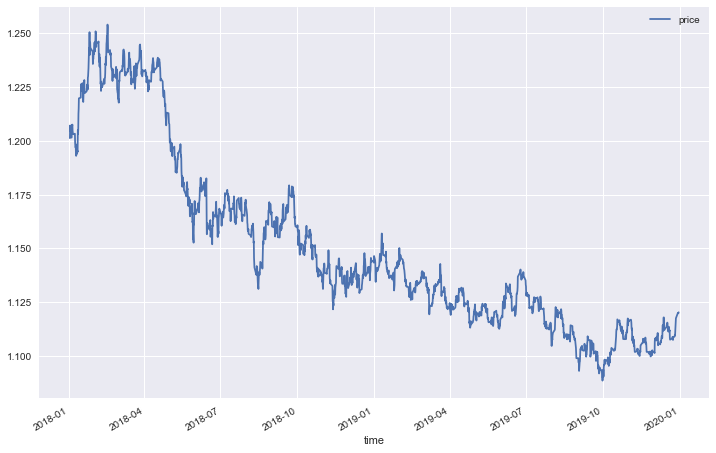

In [4]:
# Plotting the data
data.plot(figsize = (12,8))
plt.show()

As we are talking about mean-reversion, the plan is to identify extreme prices

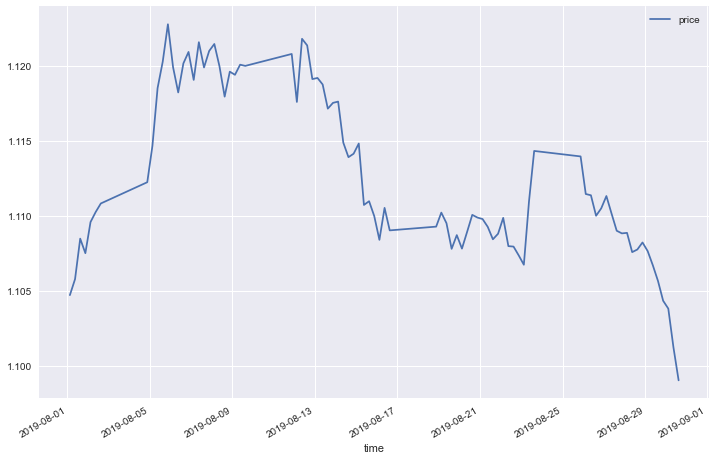

In [5]:
# Plotting a zoomed in plot for July 2019
data.loc['2019-08'].plot(figsize = (12,8))
plt.show()

In [6]:
# Calculating log returns and adding a column to dataframe
data['returns'] = np.log(data.div(data.shift(1)))
data.head()

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921


# Defining a Mean-Reversion strategy using Bollinger Bands
1. Mean Reversion: Financial Instruments are from time to time overbought/oversold and revert back to mean prices
2. Bollinger Bands: Consists of a SMA(e.g. 30) and Upper and Lower Bands +-(2) Std. Dev away from SMA

In [7]:
# Specifying our SMA and std dev
SMA = 30
dev = 2

In [8]:
# Calculating SMA and adding a column to dataframe using rolling() method
data['SMA'] = data['price'].rolling(SMA).mean()

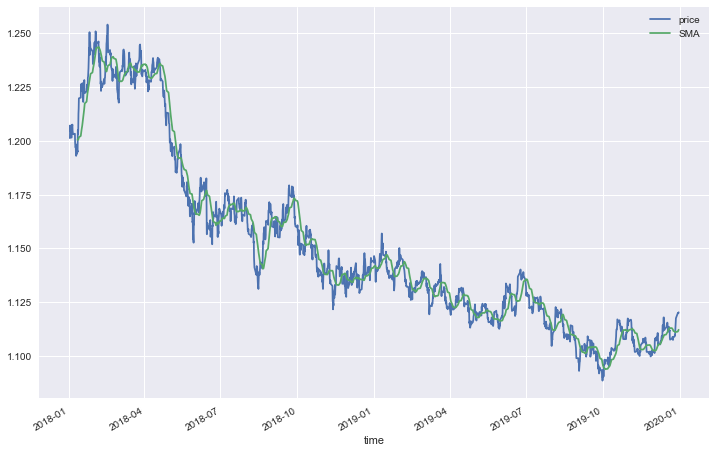

In [9]:
# Plotting SMA and price
data[['price', 'SMA']].plot(figsize = (12,8))
plt.show()

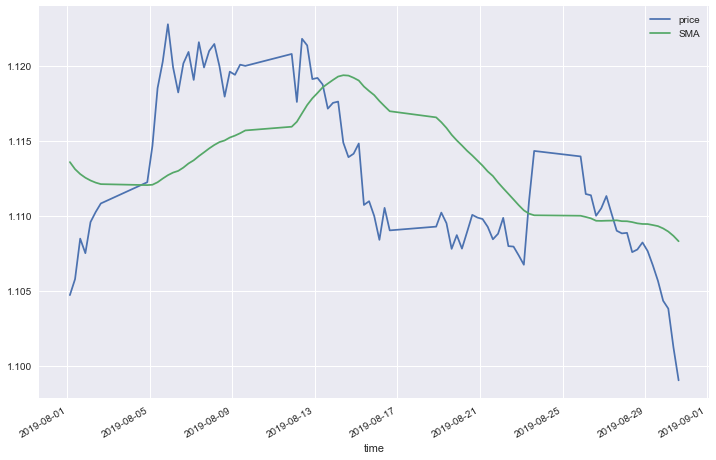

In [10]:
# Plottting SMA and prices for a particular month to get a closer perspective
data.loc['2019-08',['price', 'SMA']].plot(figsize = (12,8))
plt.show()

In [11]:
# Calculating simple moving standard deviation
data['price'].rolling(SMA).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

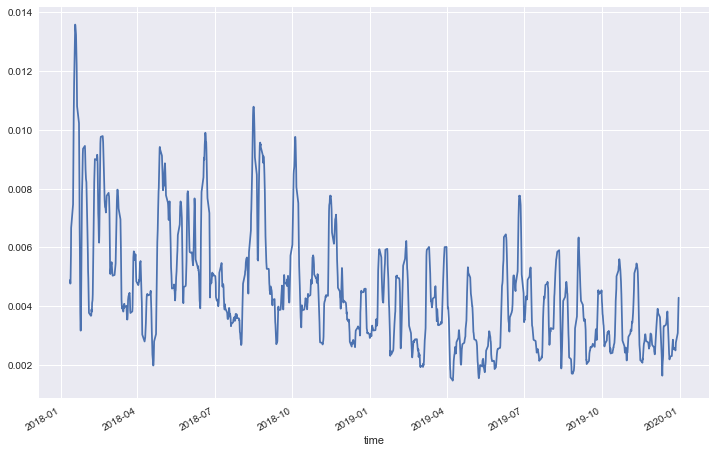

In [12]:
# Plotting rolling std dev
data['price'].rolling(SMA).std().plot(figsize = (12,8))
plt.show()

In [13]:
# Calculating and adding a column to dataframe for Lower Band -2 std dev
data['Lower'] = data['SMA'] - data['price'].rolling(SMA).std() * dev

In [14]:
# Calculating and adding a column to dataframe for Upper Band +2 std dev
data['Upper'] = data['SMA'] + data['price'].rolling(SMA).std() * dev

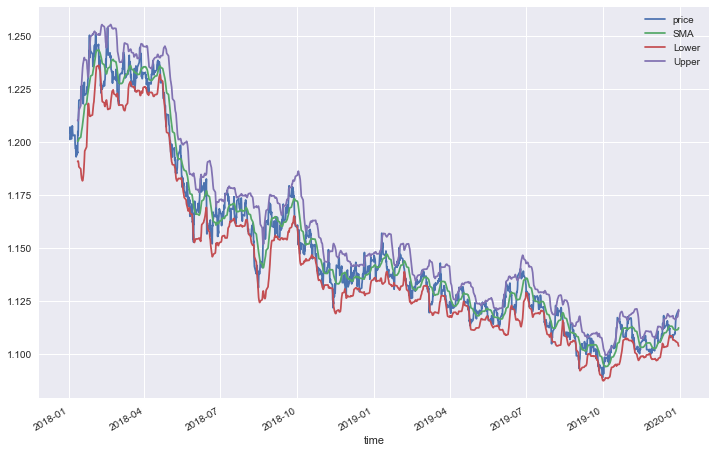

In [15]:
# Plotting all columns in our dataframe except returns
data.drop(columns = 'returns').plot(figsize = (12,8))
plt.show()

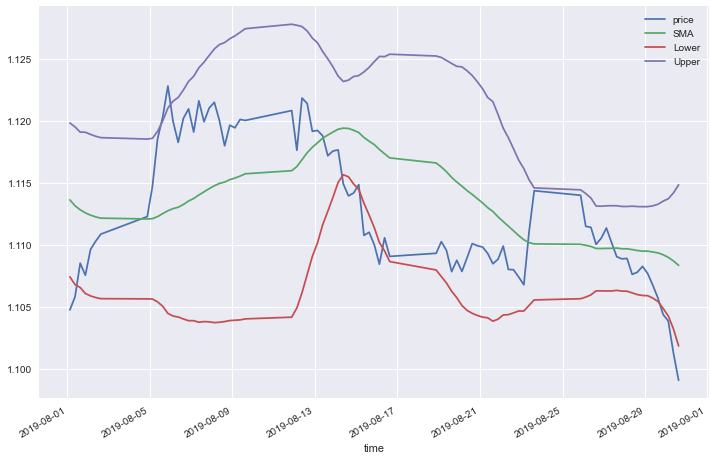

In [17]:
# Plotting for a particular month to take a closer look
data.drop(columns = 'returns').loc['2019-08'].plot(figsize = (12,8))
plt.show()

In [18]:
# dropping missing values
data.dropna(inplace = True)

1. Now we have to determine when to take positions short,neutral or long
2. When the current price is below the lower band, this is a signal to take a long position(+1)
3. When the prices crosses the SMA, go neutral (0). Keep the neutral position until the price breaks the upper or lower band again
4. When the prices cross the upper band, take a short position (-1) until the price hits SMA again.
5. Positions can be defined using vectorised pandas code
6. This is the situation where we reach the limits of vectorised backtesting as definiting the positions with conditional if-else statements would be more straightforward and easier

In [19]:
data.head()

,price,returns,SMA,Lower,Upper
time,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122


In [20]:
# Creating a helper column 'distance' to calculate difference between price and SMA
# We are actually only interested in the sign of the difference i.e. whether price is above or below SMA
data['distance'] = data.price - data.SMA

In [21]:
# 1. If oversold i.e. when price goes below Lower Band --> Go Long (+1)
data['position'] = np.where(data.price < data.Lower, 1, np.nan)

In [22]:
# 2. If overbought i.e. when price goes above Upper Band --> Go Short (-1). In all other cases we adopt the values we had 
# from above position argument
data['position'] = np.where(data.price > data.Upper, -1, data['position'])

In [23]:
data.head()

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,NaN
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0


In [24]:
# 3. When price crosses SMA --> Go Neutral i.e. 0
# Whenever the product of current distance and shifted distance is negative, that means the price has crossed SMA
data['position'] = np.where(data.distance * data.distance.shift(1) < 0, 0, data['position'])

In [29]:
data.head()

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0


In [28]:
# 4. Where rules 1-3 aren't applicable --> hold previous position
# This is a way to fill NaN values in position column. We use the forward fill method ffill(). Since we do not have any 
# position before the first row, we fill it with 0
data.position = data.position.ffill().fillna(0)

In [30]:
# Ananlysing position column with value_counts()
data.position.value_counts()

 0.0    919
 1.0    596
-1.0    526
Name: position, dtype: int64

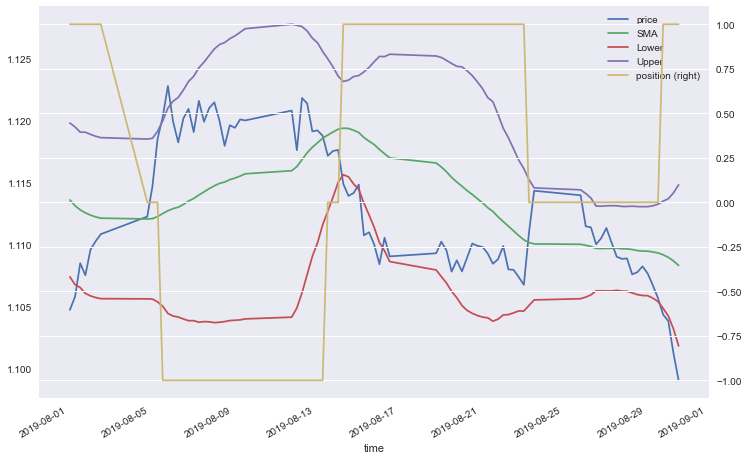

In [32]:
# PLotting prices and bollinger band. Dropping distance and returns column for a particular month
# position column is plotted on secondary y axis
data.drop(columns = ['returns', 'distance']).loc['2019-08'].plot(figsize = (12,8), secondary_y = 'position')
plt.show()

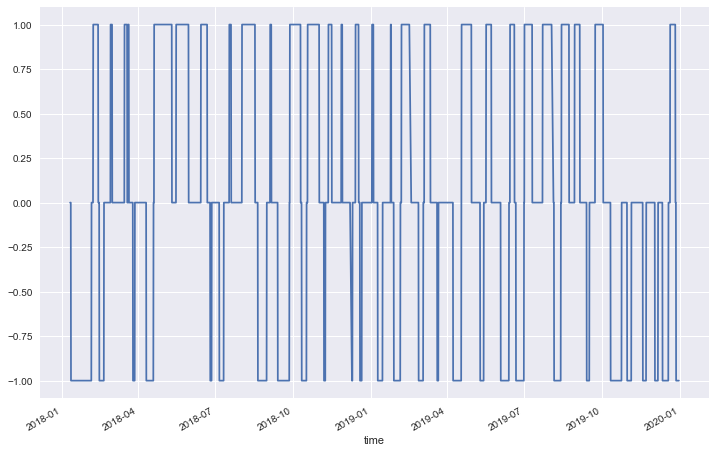

In [33]:
# Plotting all positions for entire period
data.position.plot(figsize = (12,8))
plt.show()

1. We have quite a lot of changes in positions here, but the trades are not as numerous as contrarian strategy
2. So Mean-Reversion strategy might be more cost-effective than momentum/contrarian strategy

# Vectorised Strategy Backtesting

In [34]:
data.head()

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0


In [35]:
# Creating an additional column strategy with strategy returns in it
data['strategy'] = data.position.shift(1) * data['returns']
data.dropna(inplace = True)
data.head()

,price,returns,SMA,Lower,Upper,distance,position,strategy
time,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887


In [36]:
# Adding columns for cumulative buy and hold returns and cumulative strategy returns
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

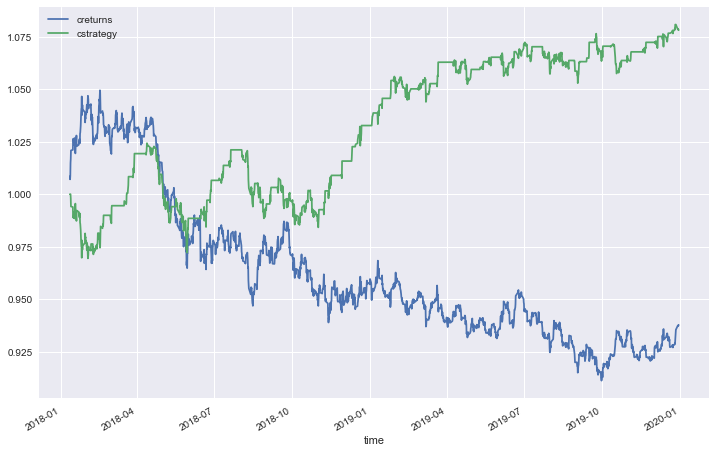

In [37]:
# Plotting cumulative strategy returns and buy and hold returns for comparison
data[['creturns', 'cstrategy']].plot(figsize = (12,8))
plt.show()

1. The horizontal sections in our cumulative strategy returns line plot indicate periods where we had neutral position
2. This was the analysis before taking into account trading costs

In [40]:
data.tail()

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
time,,,,,,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981,1.120011,0.007924,-1.0,0.000156,0.937352,1.078555
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679,1.120832,0.008099,-1.0,-0.000388,0.937716,1.078136


# Adding Trading costs to analysis

In [47]:
# Assuming proportional trading costs to be 0.00007 for EUR/USD
ptc = 0.00007

In [48]:
# Creating an additional column for number of trades per period
data['trades'] = data.position.diff().fillna(0).abs()

In [49]:
# Calculating total number of trades
data.trades.value_counts()

0.0    1929
1.0     111
Name: trades, dtype: int64

In [50]:
# Calculating period returns net of costs and adding a column to dataframe
data['strategy_net'] = data.strategy - data.trades * ptc

In [ ]:
# Adding to dataframe a column for cumulative strategy returns net of costs 

In [52]:
data['cstrategy_net'] = data.strategy_net.cumsum().apply(np.exp)

In [54]:
data.tail()

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
time,,,,,,,,,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0,-0.002092,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0,-0.000018,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0,-0.000138,1.070040
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981,1.120011,0.007924,-1.0,0.000156,0.937352,1.078555,0.0,0.000156,1.070207
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679,1.120832,0.008099,-1.0,-0.000388,0.937716,1.078136,0.0,-0.000388,1.069792


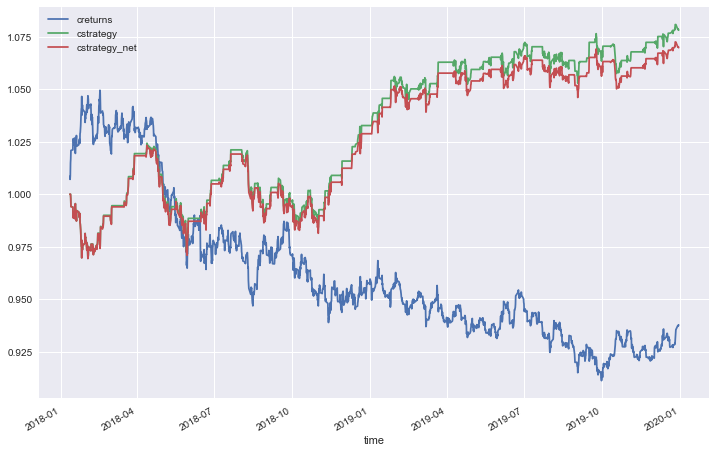

In [55]:
# Visualising net returns for comparison with net strategy returns
data[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize = (12,8))
plt.show()

1. We see that trading costs do not have a drastic impact on our strategy returns
2. Difference between green and red is our total trading cost
3. So mean-reversion is still a more cost-efficient strategy than simple contrarian/momentum for this case of EUR/USD
4. Incorporating a neutral trading position is one of the secrets to make a cost-efficient trading strategy

In [56]:
# Calculating annualised return
# multiplying by 4 because the data is of 6h granularity. and 252 because that is the approximate number of days in a year
data[['returns', 'strategy_net']].mean() * (4 * 252)

returns        -0.031776
strategy_net    0.033335
dtype: float64

In [57]:
# Caclulating annualised risk
data[['returns', 'strategy_net']].std() * np.sqrt(4 * 252)

returns         0.059975
strategy_net    0.044624
dtype: float64

1. It turns out that our strategy is outperforming buy and hold with lesser risk. A desirable attribute indeed
2. This is happening because our strategy incorporates neutral positions as well